In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

TIMESTAMP = 1638294786.9697845
DATA_DIRECTORY = '../data'

perf_data = pd.read_csv(os.path.join(DATA_DIRECTORY, f'{TIMESTAMP}_performance_stats.csv'))
perf_data['timestamp'] = pd.to_datetime(perf_data['timestamp'])
perf_data.head()

,iteration,timestamp,iteration_duration,training_duration,examples_read_from_queue,length_train_examples
0,1,1970-01-01 00:00:01.638297318,2119.456653,17.130143,10,2000
1,2,1970-01-01 00:00:01.638298375,1056.551436,34.403910,40,4000
2,3,1970-01-01 00:00:01.638299467,1092.254802,51.698785,18,6000
3,4,1970-01-01 00:00:01.638300572,1105.114981,69.033993,19,8000
4,5,1970-01-01 00:00:01.638302916,2344.427264,84.150328,18,10000


<AxesSubplot:xlabel='iteration'>

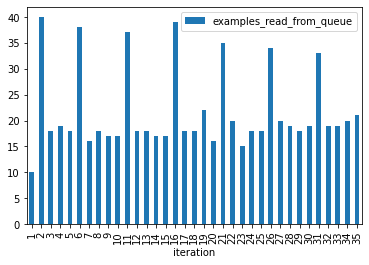

In [2]:
perf_data.plot.bar(x='iteration', y='examples_read_from_queue')

<AxesSubplot:xlabel='iteration'>

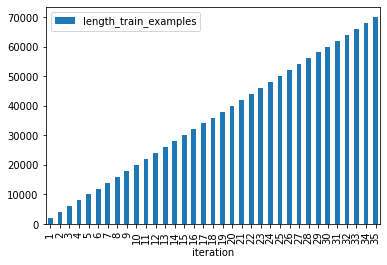

In [3]:
perf_data.plot.bar(x='iteration', y='length_train_examples')

<AxesSubplot:xlabel='iteration'>

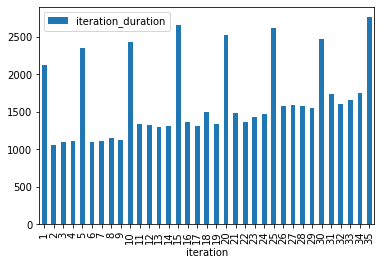

In [4]:
perf_data.plot.bar(x='iteration', y='iteration_duration')

In [5]:
rndm_data = pd.read_csv(os.path.join(DATA_DIRECTORY, f'{TIMESTAMP}_random_player_game_stats.csv'))
rndm_data['timestamp'] = pd.to_datetime(perf_data['timestamp'])
rndm_data.set_index('iteration')
rndm_data.head()

,iteration,timestamp,wins,losses,draws,nnet_cumul_rewards,random_cumul_rewards
0,1,1970-01-01 00:00:01.638297318,2.0,2.0,4.0,0.166667,-0.166667
1,5,1970-01-01 00:00:01.638298375,3.0,2.0,3.0,0.166667,-0.166667
2,10,1970-01-01 00:00:01.638299467,2.0,3.0,3.0,-0.333333,0.333333
3,15,1970-01-01 00:00:01.638300572,0.0,1.0,7.0,-0.166667,0.166667
4,20,1970-01-01 00:00:01.638302916,0.0,1.0,7.0,-0.333333,0.333333


In [6]:
hrstc_data = pd.read_csv(os.path.join(DATA_DIRECTORY, f'{TIMESTAMP}_heuristic_player_game_stats.csv'))
hrstc_data['timestamp'] = pd.to_datetime(perf_data['timestamp'])
hrstc_data.set_index('iteration')
hrstc_data.head()

,iteration,timestamp,wins,losses,draws,nnet_cumul_rewards,random_cumul_rewards
0,1,1970-01-01 00:00:01.638297318,0.0,8.0,0.0,-7.833333,7.833333
1,5,1970-01-01 00:00:01.638298375,0.0,8.0,0.0,-7.000000,7.000000
2,10,1970-01-01 00:00:01.638299467,0.0,5.0,3.0,-4.833333,4.833333
3,15,1970-01-01 00:00:01.638300572,0.0,6.0,2.0,-5.833333,5.833333
4,20,1970-01-01 00:00:01.638302916,0.0,8.0,0.0,-7.333333,7.333333


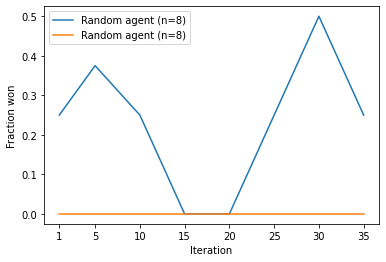

In [7]:
rndm_n_games = int(rndm_data['wins'][0] + rndm_data['losses'][0] + rndm_data['draws'][0])
hrstc_n_games = int(rndm_data['wins'][0] + rndm_data['losses'][0] + rndm_data['draws'][0])

rndm_fraction_won = rndm_data.apply(lambda row: row['wins'] / rndm_n_games, axis=1).to_list()
hrstc_fraction_won = hrstc_data.apply(lambda row: row['wins'] / hrstc_n_games, axis=1).to_list()

plt.plot(rndm_data['iteration'], rndm_fraction_won,  label=f'Random agent (n={rndm_n_games})')
plt.plot(rndm_data['iteration'], hrstc_fraction_won,  label=f'Random agent (n={hrstc_n_games})')
plt.xticks(rndm_data['iteration'])
plt.xlabel('Iteration')
plt.ylabel(f'Fraction won')
plt.legend()
plt.show()

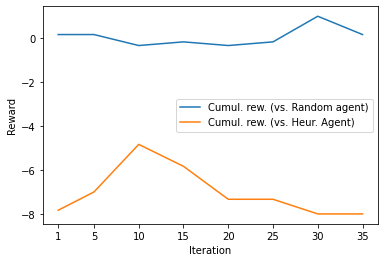

In [8]:
plt.plot(rndm_data['iteration'], rndm_data['nnet_cumul_rewards'],  label=f'Cumul. rew. (vs. Random agent)')
plt.plot(rndm_data['iteration'], hrstc_data['nnet_cumul_rewards'],  label=f'Cumul. rew. (vs. Heur. Agent)')
plt.xticks(rndm_data['iteration'])
plt.xlabel('Iteration')
plt.ylabel(f'Reward')
plt.legend()
plt.show()